In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
import pandas as pd
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.17.0


In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape)

(60000, 28, 28)


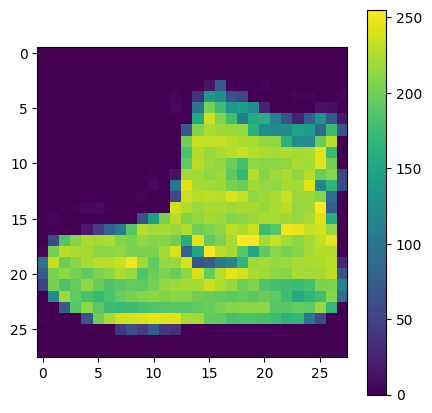

In [12]:
plt.figure(figsize=(5,5))
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [15]:
train_images = train_images / 255.0
test_images = test_images / 255.0
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

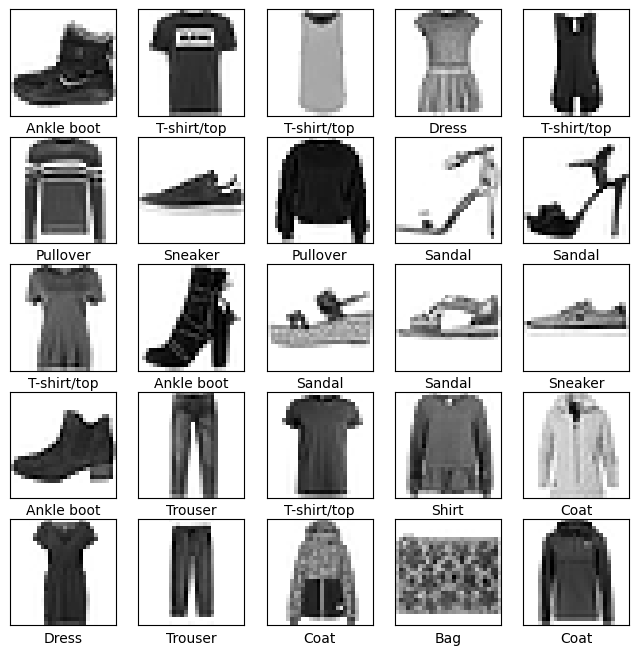

In [17]:
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [20]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [21]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 879us/step - accuracy: 0.5644 - loss: 1.5010
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 868us/step - accuracy: 0.7603 - loss: 0.6668
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 846us/step - accuracy: 0.7906 - loss: 0.5792
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 834us/step - accuracy: 0.8149 - loss: 0.5273
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 840us/step - accuracy: 0.8215 - loss: 0.5032
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 840us/step - accuracy: 0.8296 - loss: 0.4795
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 855us/step - accuracy: 0.8334 - loss: 0.4712
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 856us/step - accuracy: 0.8395 - loss: 0.4551
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 874us/step - accuracy: 0.8450 - loss: 0.4430
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 952us/step - accuracy: 0.8487 - loss: 0.4310


In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy:", test_acc)

313/313 - 0s - 751us/step - accuracy: 0.8341 - loss: 0.4605

Test accuracy: 0.8341000080108643


In [23]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()]) 

In [24]:
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step


In [25]:
predictions[0]

array([4.73310365e-07, 3.68416586e-09, 2.53976782e-06, 3.73614807e-06,
       5.01634395e-06, 1.13033734e-01, 2.20054972e-05, 2.69576669e-01,
       4.24873969e-03, 6.13107085e-01], dtype=float32)

In [26]:
np.argmax(predictions[0])

9

In [27]:
test_labels[0]

9

In [29]:
img = test_images[1]
print(img.shape)

(28, 28)


In [30]:
img = np.expand_dims(img, axis=0)
print(img.shape)

(1, 28, 28)


In [31]:
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[[5.0428120e-04 8.5120064e-06 8.9245534e-01 7.9089332e-05 1.0993364e-02
  5.7320199e-10 9.5888242e-02 2.2096645e-16 7.1210241e-05 9.2073059e-12]]


In [33]:
imgHold = np.argmax(predictions_single)
class_names[imgHold]

'Pullover'